In [1]:
from UTILITY_quickstart import *
?initializeTao

Signature:
initializeTao(
    filePath=None,
    lastTrackedElement='end',
    csrTF=False,
    inputBeamFilePathSuffix=None,
    numMacroParticles=None,
    loadDefaultLatticeTF=True,
    defaultsFile=None,
    runImpactTF=False,
    impactGridCount=32,
)
Docstring: <no docstring>
File:      ~/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py
Type:      function

In [4]:
tao = initializeTao(
    inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights_driverOnly_2023-05-16InjectorMatch.h5',
    numMacroParticles = 1e4,
    loadDefaultLatticeTF=False,
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Base Tao lattice
Number of macro particles = 10000.0


In [11]:
trackBeam(tao)

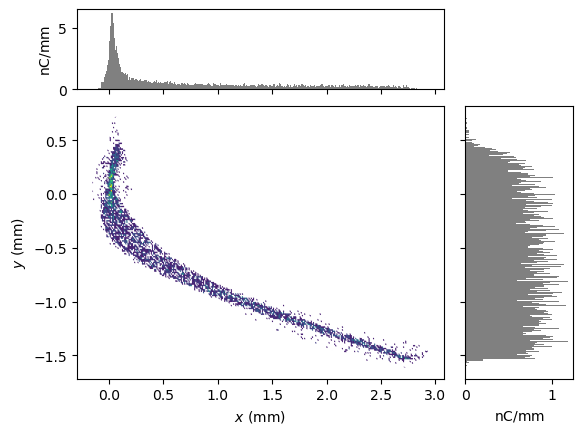

ParticleGroup with 10000 particles with total charge 1.6018414376841442e-09 C


In [12]:
P =  getBeamAtElement(tao, "DTOTR")

display(plotMod(P, 'x', 'y',  bins=300));
plt.clf()

print(P)

In [5]:
setQuadkG(tao, "Q0FF", 0)
trackBeam(tao)

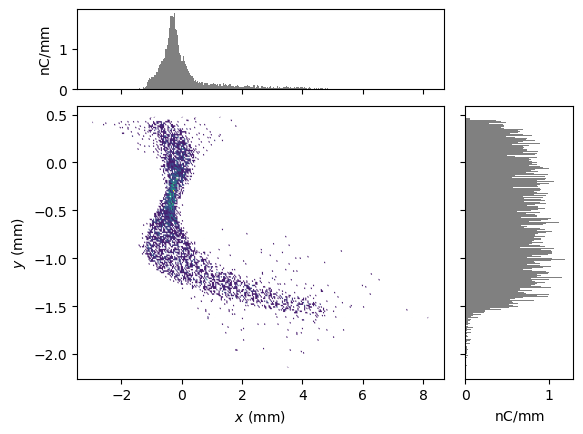

ParticleGroup with 10000 particles with total charge 1.6018414376841442e-09 C


In [6]:
P =  getBeamAtElement(tao, "DTOTR")

display(plotMod(P, 'x', 'y',  bins=300));
plt.clf()

print(P)

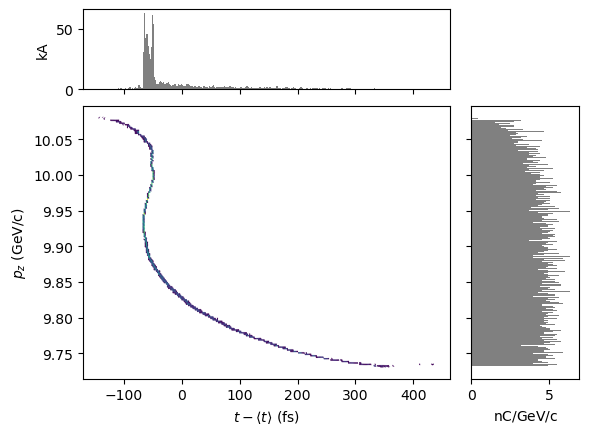

ParticleGroup with 10000 particles with total charge 1.6018414376841442e-09 C


In [7]:
P =  getBeamAtElement(tao,"MFFF")


display(plotMod(P, 'delta_t', 'pz',  bins=300));
plt.clf()

print(P)

In [8]:
setLinacPhase(tao, "L2", -10)
trackBeam(tao)

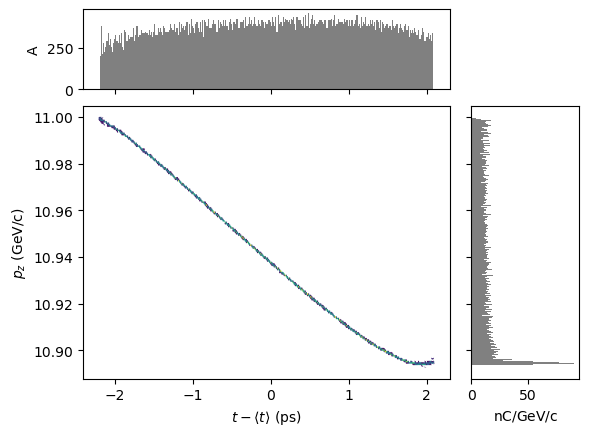

ParticleGroup with 10000 particles with total charge 1.6018414376841442e-09 C


In [9]:
P =  getBeamAtElement(tao, "MFFF")


display(plotMod(P, 'delta_t', 'pz',  bins=300));
plt.clf()

print(P)

In [7]:
tao = initializeTao(
    inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights_driverOnly_2023-05-16InjectorMatch.h5',
    numMacroParticles = 1e3
)


#results = []
#results = pd.DataFrame()
results = {"phase": [], "energy": []}
for L2PhaseSet in np.arange(-40, 10, 5):
    setLinacPhase(tao, "L2", L2PhaseSet)
    trackBeam(tao)
    P =  getBeamAtElement(tao, "MFFF")
    #results.append([L2PhaseSet, P["mean_energy"]])
    results["phase"].append(L2PhaseSet)
    results["energy"].append(P["mean_energy"])
    print([L2PhaseSet, P["mean_energy"]])

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
No defaults file provided to setLattice(). Using setLattice_defaults.yml
Loading default setLattice() values
Number of macro particles = 1000.0
[-40, 9782996990.398943]
[-35, 10048618431.176786]
[-30, 10306864344.970049]
[-25, 10523664602.240082]
[-20, 10701562245.662846]
[-15, 10840453587.615389]
[-10, 10939735757.923412]
[-5, 10998921712.309677]
[0, 11017624350.73882]
[5, 10995815029.14874]


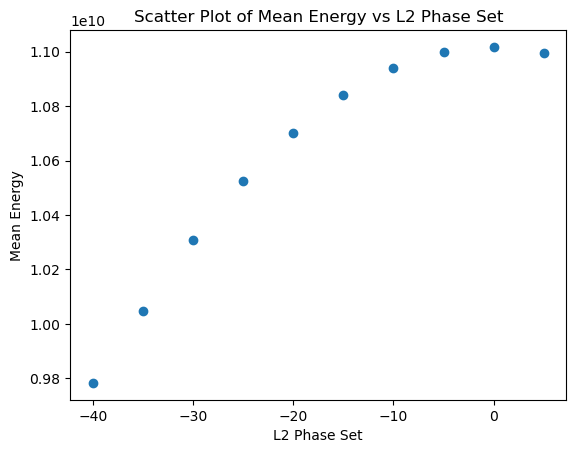

In [8]:
# Extracting the data for plotting
#L2PhaseSet_values = [result[0] for result in results]
#mean_energy_values = [result[1] for result in results]

# Creating the scatter plot
#plt.scatter(L2PhaseSet_values, mean_energy_values)

plt.scatter(results["phase"], results["energy"])

# Adding title and labels
plt.title('Scatter Plot of Mean Energy vs L2 Phase Set')
plt.xlabel('L2 Phase Set')
plt.ylabel('Mean Energy')

# Display the plot
plt.show()

In [ ]:
from 